# 4.10 IC Profile Alcohol

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Profiling Variable: Alcohol <br>
 > 04.01 Distribution of Profiles <br>
 > 04.02 Descriptive Statistics for each profiled segment <br>
 > 04.03 Relationship with profiles and regions / departments <br>
 

## 01 Import Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl')) 

## 03 Data Checks

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [5]:
df.shape

(30964564, 32)

## 04 Profiling Variable: Alcohol

In [6]:
# Create flag variable for alcohol
df.loc[(df['department_id'] ==5),'alcohol_flag'] = 1

In [7]:
# Check counts
df['alcohol_flag'].value_counts(dropna = False)

NaN    30819937
1.0      144627
Name: alcohol_flag, dtype: int64

In [8]:
df['purchase_alcohol_count'] = df.groupby(['user_id'])['alcohol_flag'].transform(np.sum)

In [9]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag,alcohol_flag,purchase_alcohol_count
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,0.0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,0.0
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,0.0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,0.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,0.0


In [10]:
# Check counts
df['purchase_alcohol_count'].value_counts(dropna = False)

0.0      28634074
1.0        425501
2.0        269393
3.0        187986
4.0        143796
           ...   
146.0         224
133.0         224
163.0         170
105.0         141
101.0         114
Name: purchase_alcohol_count, Length: 178, dtype: int64

In [11]:
# Create profile variable for alcohol
df.loc[(df['purchase_alcohol_count'] >= 1),'alcohol_flag'] = 'Alcohol'

In [12]:
# Create profile variable for alcohol
df.loc[(df['purchase_alcohol_count'] == 0),'alcohol_flag'] = 'No Alcohol'

In [13]:
# Check counts
df['alcohol_flag'].value_counts(dropna = False)

No Alcohol    28634074
Alcohol        2330490
Name: alcohol_flag, dtype: int64

### 04.01 Distribution of Profiles

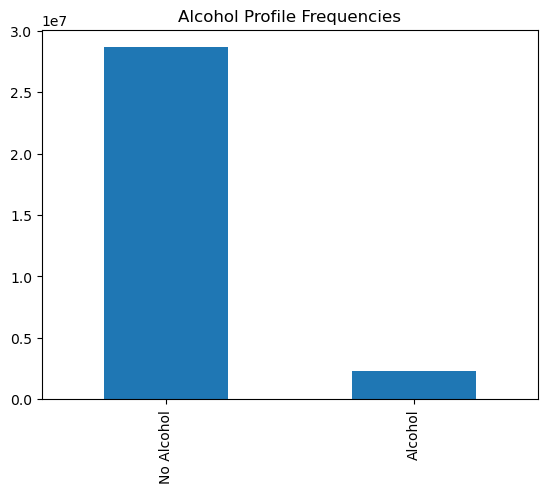

In [14]:
# Bar graph by profiled segment
bar_profile_alcohol = df['alcohol_flag'].value_counts().plot.bar(title='Alcohol Profile Frequencies')

In [15]:
# Export bar chart
bar_profile_alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_alcohol.png'), bbox_inches='tight')


### 04.02 Descriptive Statistics for each profiled segment

In [16]:
# Comparing mean, min, max for each profile group
df.groupby('alcohol_flag').agg({'prices': ['mean','min','max']})

prices           
                  mean  min   max
alcohol_flag                     
Alcohol       7.779533  1.0  25.0
No Alcohol    7.791490  1.0  25.0

In [17]:
# Comparing the total of prices for each profile group
df.groupby('alcohol_flag').agg({'prices': ['sum']})

,prices
,sum
alcohol_flag,
Alcohol,18115421.1
No Alcohol,223078814.5


In [18]:
df.groupby('alcohol_flag').agg({'order_number': ['mean','min','max']})

order_number        
                     mean min max
alcohol_flag                     
Alcohol         16.895128   1  99
No Alcohol      17.910566   1  99

### 04.03 Relationship with profiles and regions / departments

In [19]:
# Check counts
df['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

In [20]:
# Check counts
df['department_id'].value_counts(dropna = False).sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

In [21]:
crosstab_depts = pd.crosstab(df['department_id'], df['alcohol_flag'], dropna = False)
crosstab_depts

alcohol_flag,Alcohol,No Alcohol
department_id,,
1,160041,1961690
2,6401,28010
3,105897,1014931
4,421763,8657510
5,144627,0
6,21004,234987
7,252577,2319324
8,17539,75521
9,64963,757173


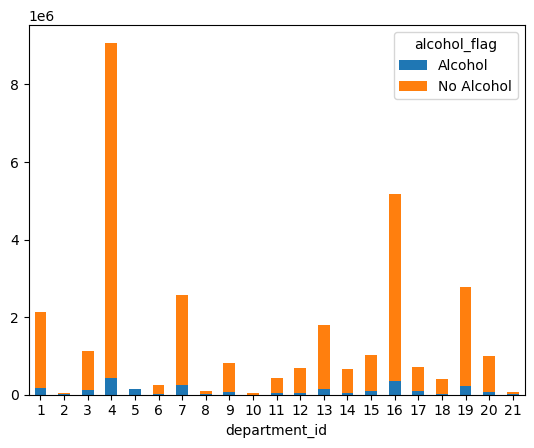

In [22]:
# Create a stacked bar chart of this data.
bar_profile_alcohol_depts = crosstab_depts.plot.bar(rot = 0, stacked = True)

In [29]:
# to clipboard
crosstab_depts.to_clipboard()

In [24]:
# Export bar chart
bar_profile_alcohol_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_alcohol_depts.png'))

In [25]:
crosstab_regions = pd.crosstab(df['region'], df['alcohol_flag'], dropna = False)
crosstab_regions

alcohol_flag,Alcohol,No Alcohol
region,,
Midwest,547269,6714244
Northeast,392477,5072208
South,786496,9524643
West,604248,7322979


In [31]:
# crosstab to clipboard
crosstab_regions.to_clipboard()

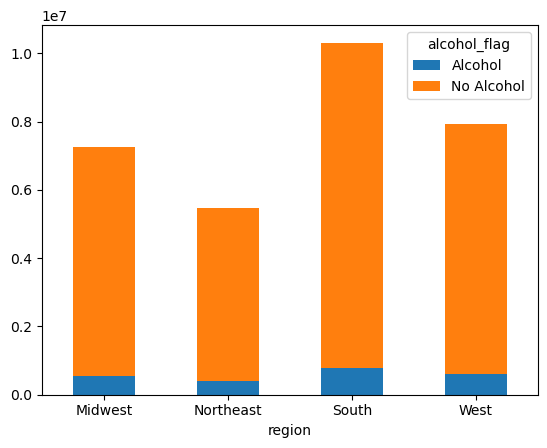

In [27]:
# Create a stacked bar chart of this data.
bar_profile_alcohol_regions = crosstab_regions.plot.bar(rot = 0, stacked = True)

In [28]:
# Export bar chart
bar_profile_alcohol_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_alcohol_regions.png'))